In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy   as np
import sklearn as skl

import matplotlib.pyplot as plt
import seaborn           as srn

from sklearn.model_selection       import train_test_split
from sklearn.svm                   import OneClassSVM
from sklearn.kernel_approximation  import Nystroem
from sklearn.neighbors             import KernelDensity
from sklearn.model_selection       import GridSearchCV
from sklearn.metrics               import pairwise_distances
from scipy.stats                   import beta

Generate samples from a Beta(2, 2) distribution.

In [3]:
np.random.seed(42)
N = 10**4

X     = beta.rvs(a = 2, b = 2, size = N)[:,np.newaxis]
pStar = lambda x: beta.pdf(x, a = 2, b = 2)
outfile = "/Users/raghav/Documents/Uni/NIPS-2018/experiments/sanity_beta_distribution/weights/"
XTrans=X
# w_1 = np.load(outfile+"w_1.npy")
# bias_1 = np.load(outfile+"bias1.npy")

# XTrans = np.cos(X * w_1 + bias_1)
# print XTrans.shape

XTr, XTe = train_test_split(XTrans, train_size = 0.80, test_size = 0.20, random_state = 42)
# XTe      = XTe[np.argsort(XTe.flatten()),:]
print XTr.shape
print XTe.shape

(8000, 1)
(2000, 1)


Compute an optimal bandwidth for the RBF kernel using cross-validation, with log-likelihood of density estimation as the target to maximise. Using the median distance between points as an anchor for constructing a grid of possible bandwidths.

In [3]:
# X = XTrans
# D = pairwise_distances(X, X).flatten()

# params = { 'bandwidth' : [ np.percentile(D, q = 50) * 2**x for x in np.arange(-5, +3 + 0.5, 0.5) ] }
# grid   = GridSearchCV(KernelDensity(), params)
# grid.fit(X[:1000, :]) # sub-sample 1000 points for tractability
# kde  = grid.best_estimator_

Convert the bandwidth of the form $e^{-\| x - x' \|^2/2h^2}$ into one of the form $e^{-\gamma \| x - x' \|^2}$.

In [4]:
# gam0 = 1/np.median(pairwise_distances(XTr, XTr)**2)
# gMed = 0.5 / kde.bandwidth**2

Fit a OC-SVM with RBF kernel, targetting the 10% density threshold.

In [6]:
ocsvm = OneClassSVM(nu = 0.10, kernel = 'rbf')
ocsvm.fit(XTr)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

Plot the true density, the 10% quantile threshold for the density, and the OC-SVM predictions.

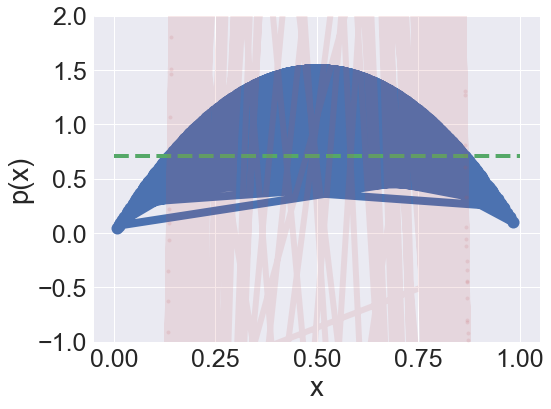

In [7]:
srn.set(font_scale = 2.5);
plt.figure(figsize = (8,6));

rStar = np.percentile(pStar(XTe), q = 100 * 0.10)

plt.plot(XTe, pStar(XTe),                        '.-', linewidth=8, markersize=24);
plt.plot([0,1], [rStar,rStar],                   '--', linewidth=4, markersize=24);
plt.plot(XTe, ocsvm.decision_function(XTe),      '.-', linewidth=6, markersize=8, alpha=0.125);
plt.ylim((-1, 2))
plt.xlabel('x'); plt.ylabel('p(x)');
plt.savefig('beta_test.pdf', bbox_inches = 'tight');

In [7]:
ocnn_wt = np.load(outfile+"w_2.npy")

ocsvm_wt = ocsvm.coef_
ocsvm_wt= np.transpose(ocsvm_wt)



Plotting histogram of weights

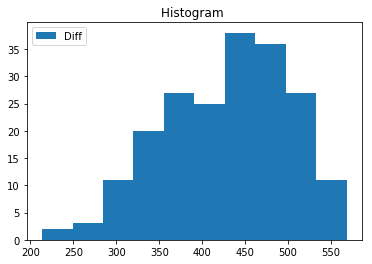

In [17]:
import matplotlib.pyplot as plt
# plt.hist(w1,label="OCSVM")  # arguments are passed to np.histogram
# plt.hist(w_2,label="OC_NN") 
plt.hist(ocsvm_wt - ocnn_wt,label="Diff") 
plt.legend(loc='upper left')
plt.title("Histogram ")
plt.show()

# Save the ocsvm_weights 
np.save(outfile+"ocsvm_wt",ocsvm_wt)

1) Compute ocsvm : loss function value
2) Intialize the weights of oc-nn with ocsvm coeffients.

In [18]:
def compute_OCSVM_lossValue(ocsvm_wt,XTrans,nu=0.1,rho=0.1):
    
    loss = 0.5*ocsvm_wt**2  -rho
#   loss = 0.5*ocsvm_wt**2 + ((1/nu) * XTrans) - rho
    return loss
print ocsvm_wt.shape


(200, 1)


In [15]:
compute_OCSVM_lossValue(ocsvm_wt,XTrans,0.1,0.1)

array([[  90924.69563372],
       [ 124344.93311716],
       [  97547.23449609],
       [ 104381.42955227],
       [  81494.17903843],
       [ 102372.20535755],
       [  40427.86988424],
       [  94106.13258336],
       [ 114436.58743844],
       [  62256.21648394],
       [  88067.64385862],
       [ 146768.81323908],
       [ 126443.30806809],
       [  74507.54511725],
       [ 111473.33931656],
       [  99985.23355404],
       [  83167.00664461],
       [  69295.7533909 ],
       [ 132670.87904862],
       [  75123.49557943],
       [  92228.04362317],
       [ 119277.41401224],
       [ 104358.99181987],
       [  57868.26310873],
       [  61095.20852729],
       [ 116886.4745548 ],
       [ 114983.79315055],
       [  67823.65115547],
       [ 127274.47931724],
       [  60682.09354853],
       [ 114163.2260881 ],
       [  76908.34760652],
       [ 125722.26364273],
       [ 124485.72971018],
       [  78289.92534257],
       [  46384.42391612],
       [ 108769.20113163],
 